# Cross comparison of PG and 3D calculation results
---

This notebook needs to have access to utilities from both the `PlesioGeostroPy` repo and the `MCModes` repo.

In [1]:
%load_ext autoreload
%autoreload 2

import os, h5py, sys
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt

dir_pg = './'
dir_3d = '../Modes_3D/MCmodes/'
sys.path.append(dir_3d)

---
## Configure datasets

In [2]:
from pg_utils.pg_model import base, core, params
from pg_utils.pg_model import expansion as xpd

### Plesio-geostrophic model results

1. Eigenvalues

Archived version: separate files

In [176]:
df_pg_east = pd.read_table(os.path.join(dir_pg, 'out/eigen/Poloidal_Dipole_flex/Transformed_ext/eig-filter_m1_n14_Le1e-4_ideal_cEast.txt'), sep='\s+', header=0)
df_pg_west = pd.read_table(os.path.join(dir_pg, 'out/eigen/Poloidal_Dipole_flex/Transformed_ext/eig-filter_m1_n12_Le1e-4_ideal_cWest.txt'), sep='\s+', header=0)

for col in df_pg_east:
    if col == 'Index':
        continue
    df_pg_east[col] = df_pg_east[col].to_numpy().astype(np.complex128)
    df_pg_west[col] = df_pg_west[col].to_numpy().astype(np.complex128)

df_pg = pd.concat([df_pg_west, df_pg_east], axis=0)
df_pg.sort_values('120', axis=0, key=lambda x: np.abs(np.imag(x)), inplace=True)
df_pg

,Index,80,120
0,mc0,-0.0000000+0.0000970j,-0.0000000+0.0000970j
1,mc1,0.0000000+0.0016200j,-0.0000000+0.0016200j
2,mc2,-0.0000000+0.0054230j,0.0000000+0.0054250j
3,mc3,0.0000000+0.0129170j,-0.0000000+0.0129100j
4,mc4,-0.0000000+0.0256880j,0.0000000+0.0257130j
5,mc5,0.0000000+0.0459550j,-0.0000000+0.0458860j
6,mc6,-0.0000000+0.0751960j,0.0000000+0.0753590j
7,mc7,0.0000000+0.1176560j,-0.0000000+0.1172680j
8,mc8,-0.0000000+0.1718930j,0.0000000+0.1725340j
9,mc9,0.0000000+0.2486500j,-0.0000000+0.2470080j


Single file read

In [138]:
df_pg = pd.read_table(os.path.join(dir_pg, 'out/eigen/S1_T2_std/Canonical/eig-filter_ideal_m3_Le1e-4_N120.txt'), header=3, delimiter='\s+')
for col in df_pg:
    if col == 'Index':
        continue
    df_pg[col] = df_pg[col].to_numpy().astype(np.complex128)

df_pg

,Index,50,80,120
0,mc0,-0.0001720+0.0006130j,-0.0001720+0.0006130j,-0.0001720+0.0006130j
1,mc1,-0.0006840+0.0042790j,-0.0006840+0.0042790j,-0.0006840+0.0042790j
2,mc2,-0.0016850+0.0123000j,-0.0016850+0.0123000j,-0.0016850+0.0123000j
3,mc3,-0.0031770+0.0259220j,-0.0031770+0.0259220j,-0.0031770+0.0259220j
4,mc4,-0.0052060+0.0462630j,-0.0052060+0.0462630j,-0.0052060+0.0462630j
5,mc5,-0.0078340+0.0744600j,-0.0078340+0.0744600j,-0.0078340+0.0744600j
6,mc6,-0.0111280+0.1117070j,-0.0111270+0.1117060j,-0.0111270+0.1117060j
7,mc7,-0.0151570+0.1592660j,-0.0151560+0.1592680j,-0.0151560+0.1592680j
8,mc8,-0.0199860+0.2184720j,-0.0199900+0.2184700j,-0.0199900+0.2184700j
9,mc9,-0.0257070+0.2906880j,-0.0256960+0.2906800j,-0.0256960+0.2906800j


2. Eigenvectors

In [139]:
eigenfile = os.path.join(dir_pg, 'out/eigen/S1_T2_std/Canonical/eigen_ideal_m3_Le1e-4_N120_p113.h5')
# eigenfile = os.path.join(dir_pg, 'out/eigen/Poloidal_Dipole_flex/Transformed_ext/eigen_m1_Le1e-4_N120_p113.h5')

with h5py.File(eigenfile, 'r') as fread:
    xpd_identifier = fread.attrs["xpd"]
    if "azm" in fread.attrs.keys():
        azm_val = int(fread.attrs["azm"])
        Le_val = fread.attrs["Le"]
    else:
        azm_val = int(fread.attrs[sym.srepr(xpd.m)])
        Le_val = fread.attrs[sym.srepr(params.Le)]
    cnames = list(fread["bases"]["names"].asstr()[()])
    ranges_trial = fread["bases"]["ranges"][()]
    
    eig_vals_pg = fread["eigval"][()]
    eig_vecs_pg = fread["eigvec"][()]
    
idx = np.array([np.argmin(np.abs(df_pg.iloc[i, -2] - eig_vals_pg)) for i in range(df_pg.shape[0])])
eig_vals_pg = eig_vals_pg[idx]
eig_vecs_pg = eig_vecs_pg[:, idx]

# Physical params
physical_params = {
    core.t: 0,
    xpd.m: azm_val,
    params.Le: Le_val
}

### 3-D inviscid model result

In [140]:
df_3d = pd.read_table(os.path.join(dir_3d, 'runs/QGP-S1T2_Le1e-4_Lu2e+4_m3/eigenspectra_describe.txt'), header=3, delimiter='\s+')
df_3d['Value'] = df_3d['Value'].to_numpy().astype(np.complex128)

params_3d = {
    xpd.m: 3,
    params.Le: 1e-4,
    params.Lu: 2e+4
}

df_3d

,Index,Value,Type,Radial-k[Us(Up-1)]
0,mc0??,-0.0026540+0.0001400j,MC-hybrid-strange,"0-3,0-2"
1,mc5?,-0.0080250+0.0033650j,columnar-MC-hybrid,"5,5-6-8"
2,mc6,-0.0186520+0.0107630j,columnar-MC-z?,"5-6,5-7-9"
3,mc7,-0.0338230+0.0232550j,columnar-MC-z?,"6-7,6-8-10"
4,mc8,-0.0502200+0.0476350j,columnar-MC-z?,"7-8,7-9"
5,mc9,-0.0669710+0.0797350j,columnar-MC-z?,"8-9,8-10"
6,mc10,-0.0860400+0.1209090j,columnar-MC-z?,"9,9-11-13"
7,mc11,-0.1077610+0.1727800j,columnar-MC-z?,"10-12,11-12-13"
8,mc12,-0.1323020+0.2367570j,columnar-MC-z?_c-,"12,12-16"
9,mc13,-0.1597280+0.3141710j,columnar-MC-z?_c-,"12-14,14-16-18"


In [141]:
eig_vals_3d = list()
eig_vecs_3d = list()
with h5py.File(os.path.join(dir_3d, 'runs/QGP-S1T2_Le1e-4_Lu2e+4_m3/eigenmodes.h5'), 'r') as fread:
    # print(fread.keys())
    # print(fread.attrs.keys())
    # print(fread['eigenmode_target7']['eigenvecs'].shape)
    n_gps = len(fread.keys())
    for i_gps in range(n_gps):
        eig_vals_3d.append(fread[f"eigenmode_target{i_gps}"]["eigenvals"][0])
        eig_vecs_3d.append(fread[f"eigenmode_target{i_gps}"]["eigenvecs"][:, 0])

eig_vals_3d = np.array(eig_vals_3d)
eig_vecs_3d = np.array(eig_vecs_3d).T

---
## Eigenvalue comparison

### Frequency only

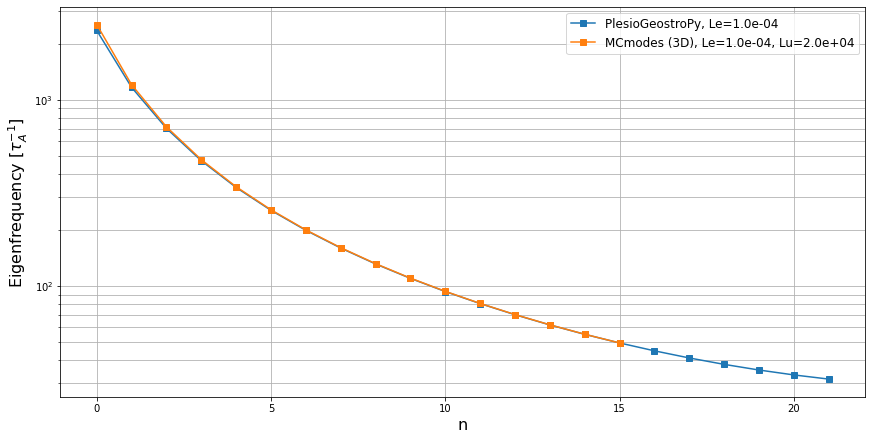

In [147]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6), layout='constrained')

match_code = 'i'
match_pg = np.array([idx[:len(match_code)] == match_code and idx[len(match_code)] != 'h' and idx[-1] not in ('a', 'b') and '?' not in idx for idx in df_pg['Index']])
match_3d = np.array([idx[:len(match_code)] == match_code and idx[len(match_code)] != 'h' and idx[-1] not in ('a', 'b') and '?' not in idx for idx in df_3d['Index']])

# match_pg[4] = False

save_name = './out/eigen/S1_T2_std/Canonical/SpecList_ideal_Le1e-4_m3_i_PGC-3DLu2e+4'
# save_name = None

# n_order = np.arange(9)
n_order = np.array([int(idx[len(match_code):]) for idx in df_pg['Index'][match_pg]])
ax.plot(n_order, np.abs(np.imag(df_pg.iloc[match_pg, -1])), 's-', 
        label="PlesioGeostroPy, Le={:.1e}".format(physical_params[params.Le]))

# n_order = np.arange(3, 13)
n_order = np.array([int(idx[len(match_code):]) for idx in df_3d['Index'][match_3d]])
ax.plot(n_order, np.abs(np.imag(df_3d['Value'][match_3d].astype(np.complex128))), 's-', 
        label="MCmodes (3D), Le={:.1e}, Lu={:.1e}".format(params_3d[params.Le], params_3d[params.Lu]))

ax.set_yscale("log")
ax.set_xlabel("n", fontsize=16)
ax.set_ylabel(r"Eigenfrequency [$\tau_A^{-1}$]", fontsize=16)
ax.legend(fontsize=12)
ax.grid(which="both")

if save_name is not None:
    plt.savefig(save_name + ".pdf", format="pdf", bbox_inches="tight")
    plt.savefig(save_name + ".png", format="png", bbox_inches="tight", dpi=150)

plt.show()

### Eigenvalues

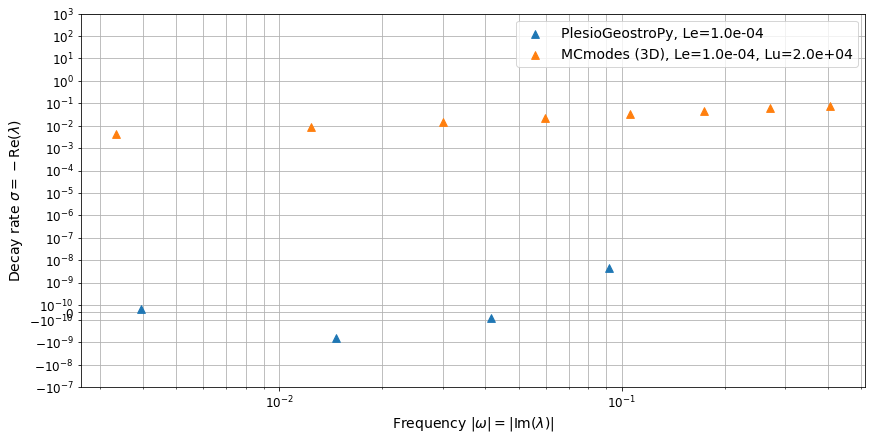

In [20]:
fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')

save_name = './out/eigen/S1_std/imgs/SpecDist_ideal_Le1e-4_m1_mc_PGC-3DLu2e+4'
save_name = None

eig_vals_tmp = df_pg.iloc[match_pg, -1]
ax.scatter(np.abs(np.imag(eig_vals_tmp)), -np.real(eig_vals_tmp), s=60, marker='^', 
           label="PlesioGeostroPy, Le={:.1e}".format(physical_params[params.Le]), zorder=5)

eig_vals_tmp = df_3d['Value'][match_3d]
ax.scatter(np.abs(np.imag(eig_vals_tmp)), -np.real(eig_vals_tmp), s=60, marker='^', 
           label="MCmodes (3D), Le={:.1e}, Lu={:.1e}".format(params_3d[params.Le], params_3d[params.Lu]), zorder=5)

ax.set_xlabel(r"Frequency $|\omega| = |\mathrm{Im}(\lambda)|$", fontsize=14)
# ax.set_xlabel(r"Frequency $\omega = \mathrm{Im}(\lambda)$", fontsize=14)
ax.set_ylabel(r"Decay rate $\sigma = -\mathrm{Re}(\lambda)$", fontsize=14)

ax.set_xscale('log')
# ax.set_xscale('symlog', linthresh=1e-3, linscale=.1)
ax.set_yscale('symlog', linthresh=1e-10, linscale=.3)
# ax.set_xlim([4, 6])
ax.set_ylim([-1e-7, 1e+3])
# ax.set_xlim([1e-3, 1e+2])
# ax.set_ylim([-1e-9, 1e-2])
ax.tick_params(axis='both', which='major', labelsize=12)

ax.grid(which="both")
ax.legend(fontsize=14, loc=1)

if save_name is not None:
    if os.path.exists(save_name + '.pdf'):
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.pdf', format="pdf", bbox_inches="tight")
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")
plt.show()

---
## Configure spectral expansions

In [18]:
from pg_utils.processing import postproc as pproc

### Plesio-geostrophic model

In [19]:
xpd_identifier

'expand_conjugate_eigen_ext-bound'

In [148]:
from pg_utils.pg_model import expand_conjugate_ext as xpd_cfg

field_func = pproc.eigen_func_from_conjugate(xpd_cfg.recipe, physical_params)

fnames = field_func._field_names
field_nrange = {
    fname: ranges_trial[i_field] if i_field < ranges_trial.size else ranges_trial[0] 
    for i_field, fname in enumerate(fnames)
}

### 3-D model

In [149]:
import models
from operators.polynomials import SphericalHarmonicMode
from operators.worland_transform import WorlandTransform
from operators.associated_legendre_transform import AssociatedLegendreTransformSingleM
from fields import VectorFieldSingleM

nr, maxnl, m_val = 63, 63, 3

# xi_array, _ = specfun.roots_chebyt(120)
# rg = np.sqrt((1 + xi_array)/2)
rg = np.linspace(0, 1, 101)
tg = np.linspace(0, np.pi, 201)
worland_transform = WorlandTransform(nr, maxnl, m_val, r_grid=rg)
legendre_transform = AssociatedLegendreTransformSingleM(maxnl, m_val, tg)

### Background field for 3-D model

Optional, but needs to be computed if one wants to calculate the PG quantities from 3-D solutions.

In [150]:
nr_bg, maxnl_bg, m_bg = 10, 3, 0

# S1
# mode_SH_list = [SphericalHarmonicMode("pol", 1, 0, "1/5 Sqrt[pi/3] r(5 - 3r^2)"),]
# SL2N2
# mode_SH_list = [SphericalHarmonicMode("pol", 2, 0, "1/4 Sqrt[3/26] r^2(5r^2 - 7)")]
# S2
# mode_SH_list = [SphericalHarmonicMode("pol", 2, 0, "5/14 Sqrt[3/182] r^2(157 - 296r^2 + 143r^4)")]
# T1S1
# mode_SH_list = [
#     SphericalHarmonicMode("pol", 1, 0, "1/2 Sqrt[(7 pi)/69] r(5 - 3r^2)"),
#     SphericalHarmonicMode("tor", 1, 0, "3/8 Sqrt[70] r(1 - r^2)")
# ]
# T2
# mode_SH_list = [SphericalHarmonicMode("tor", 2, 0, "(16/3) Sqrt[pi/5] r^2(1 - r^2)")]
# T1-SL2N1
# mode_SH_list = [
#     SphericalHarmonicMode("tor", 1, 0, "3 Sqrt[pi] r(1 - r^2)"), 
#     SphericalHarmonicMode("pol", 2, 0, "1/4 Sqrt[3/26] r^2(5r^2 - 7)")
# ]
# S1-T2
mode_SH_list = [
    SphericalHarmonicMode("pol", 1, 0, "1/5 Sqrt[pi/3] r(5 - 3r^2)"), 
    SphericalHarmonicMode("tor", 2, 0, "(16/3) Sqrt[pi/5] r^2(1 - r^2)")
]



mode_bg_list = [VectorFieldSingleM.from_SH_mode(nr_bg, maxnl_bg, mode_SH) for mode_SH in mode_SH_list]
mode_bg = mode_bg_list[0]
for mode_tmp in mode_bg_list[1:]:
    mode_bg = mode_bg + mode_tmp

---
## Mode visualisation

Meridional visualisation grid.

This set of grid in $(r, \theta)$ coordinates is a natural grid for 3-D results (since they can be made to coincide with the Worland - associated Legendre grids), but is not a natural grid for PG results.

In [152]:
from scipy import special as specfun

# Meridional grid
R_mesh, T_mesh = np.meshgrid(rg, tg)
S_mesh, Z_mesh = R_mesh*np.sin(T_mesh), R_mesh*np.cos(T_mesh)

# Phi-grid
p_array = np.linspace(0., 2*np.pi, num=201)
S_eq, P_eq = np.meshgrid(rg, p_array)
X_mesh, Y_mesh = S_eq*np.cos(P_eq), S_eq*np.sin(P_eq)

Select plesio-geostrophic mode

In [190]:
from pg_utils.numerics import matrices as nmatrix

code_pg = 'mc0'
i_pg = np.argmax(df_pg['Index'] == code_pg)
# i_pg = 21

evec_mode_pg = nmatrix.LabeledBlockArray(eig_vecs_pg[:, i_pg], cnames, ranges_trial)
evec_mode_pg = base.LabeledCollection(cnames, 
    **{cname: evec_mode_pg[cname] for cname in cnames})

Select 3-D mode

In [184]:
code_3d = 'mc0'
i_3d = np.argmax(df_3d['Index'] == code_3d)

Ndim_vec = eig_vecs_3d.shape[0] // 2

usp = VectorFieldSingleM(nr, maxnl, m_val, eig_vecs_3d[:Ndim_vec, i_3d])
bsp = VectorFieldSingleM(nr, maxnl, m_val, eig_vecs_3d[Ndim_vec:, i_3d])
norm = np.sqrt(usp.energy)
usp.normalise(norm)
bsp.normalise(norm)

Inspect energy contribution

In [26]:
u_norms_3d = np.array([np.linalg.norm(eig_vecs_3d[:Ndim_vec, i_3d]) for i_3d in range(eig_vecs_3d.shape[1])])
b_norms_3d = np.array([np.linalg.norm(eig_vecs_3d[Ndim_vec:, i_3d]) for i_3d in range(eig_vecs_3d.shape[1])])
norm_ratio_coeff = u_norms_3d/b_norms_3d

In [27]:
u_norms_3d = np.array([np.sqrt(VectorFieldSingleM(nr, maxnl, m_val, eig_vecs_3d[:Ndim_vec, i_3d]).energy) for i_3d in range(eig_vecs_3d.shape[1])])
b_norms_3d = np.array([np.sqrt(VectorFieldSingleM(nr, maxnl, m_val, eig_vecs_3d[Ndim_vec:, i_3d]).energy) for i_3d in range(eig_vecs_3d.shape[1])])
norm_ratio_energy = u_norms_3d/b_norms_3d

In [28]:
norm_ratio_coeff

array([2.46120941e-04, 1.12686469e-03, 1.84728733e-03, 1.92825376e-03,
       4.82249065e-03, 9.08125821e-03, 1.48623576e-02, 2.22904068e-02,
       3.14734196e-02, 2.10553903e+01, 2.33085878e+01, 2.60201838e+01,
       2.93305447e+01, 3.34405444e+01, 3.86465143e+01, 4.54016403e+01,
       5.44297246e+01, 6.69500711e+01, 8.51592571e+01, 1.13375060e+02,
       1.61151446e+02, 2.53571116e+02, 4.77137788e+02, 1.33528916e+03])

In [29]:
norm_ratio_energy

array([2.62743956e-04, 1.19449880e-03, 1.98217860e-03, 2.27712034e-03,
       5.27966283e-03, 9.40727260e-03, 1.45090096e-02, 2.05634938e-02,
       2.75632566e-02, 1.46688577e+01, 1.66256219e+01, 1.90047936e+01,
       2.19383338e+01, 2.56145715e+01, 3.03100867e+01, 3.64450572e+01,
       4.46843677e+01, 5.61341536e+01, 7.27546164e+01, 9.83178409e+01,
       1.40947113e+02, 2.21251594e+02, 4.07276170e+02, 1.07067269e+03])

### Meridional section

Calculate PG result on meridional plane; since the set of grid is not natural grid for PG, this takes a while

In [185]:
def calc_field_meridional_PG(fname, field_f):
    if fname not in ("U_s", "U_p", "U_z", "Zeta", "Psi"):
        return None
    N_trial = field_nrange[fname]
    S_tmp, Z_tmp = np.stack([S_mesh,]*N_trial, axis=-1), np.stack([Z_mesh,]*N_trial, axis=-1)
    N_tmp = np.stack([N_tmp*np.ones_like(S_mesh) for N_tmp in np.arange(N_trial)], axis=-1)
    eval_tmp = field_f(S_tmp, 0., Z_tmp, N_tmp, *[vec for vec in evec_mode_pg])
    if np.array(eval_tmp).ndim == 0:
        return eval_tmp*np.ones_like(S_mesh[...,0])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    return np.sum(eval_tmp, axis=-1)

eval_mode_pg = field_func.apply(calc_field_meridional_PG, inplace=False, metadata=True)

Calculate 3-D result on the meridional plane.

In [186]:
uphy_md = usp.physical_field(worland_transform, legendre_transform)
bphy_md = bsp.physical_field(worland_transform, legendre_transform)

u_sph = uphy_md.data
u_cyl = {
    's': u_sph['r']*np.sin(T_mesh) + u_sph['theta']*np.cos(T_mesh),
    'phi': u_sph['phi'],
    'z': u_sph['r']*np.cos(T_mesh) - u_sph['theta']*np.sin(T_mesh)
}
b_sph = bphy_md.at_phi(phi=0.)
b_cyl = {
    's': b_sph['r']*np.sin(T_mesh) + b_sph['theta']*np.cos(T_mesh),
    'phi': b_sph['phi'],
    'z': b_sph['r']*np.cos(T_mesh) - b_sph['theta']*np.sin(T_mesh)
}
fields_3d = {
    'U_s': u_cyl['s'], 'U_p': u_cyl['phi'], 'U_z': u_cyl['z'],
    'B_s': b_cyl['s'], 'B_p': b_cyl['phi'], 'B_z': b_cyl['z']
}

Choose phase

In [187]:
anchor_phase_pg = 1/eval_mode_pg['U_s'][np.unravel_index(np.argmax(np.abs(eval_mode_pg['U_s'])), eval_mode_pg['U_s'].shape)]
p_cst_pg = np.angle(anchor_phase_pg)/float(physical_params[xpd.m]) + np.pi/4
p_factor_pg = np.exp(1j*float(physical_params[xpd.m])*p_cst_pg)

In [188]:
anchor_phase_3d = 1/u_cyl['s'][np.unravel_index(np.argmax(np.abs(u_cyl['s'])), u_cyl['s'].shape)]
p_cst_3d = np.angle(anchor_phase_3d)/m_val + np.pi/4
p_factor_3d = np.exp(1j*m_val*p_cst_3d)

C:\Users\gentle\AppData\Local\Temp\ipykernel_5788\3895849850.py:87: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


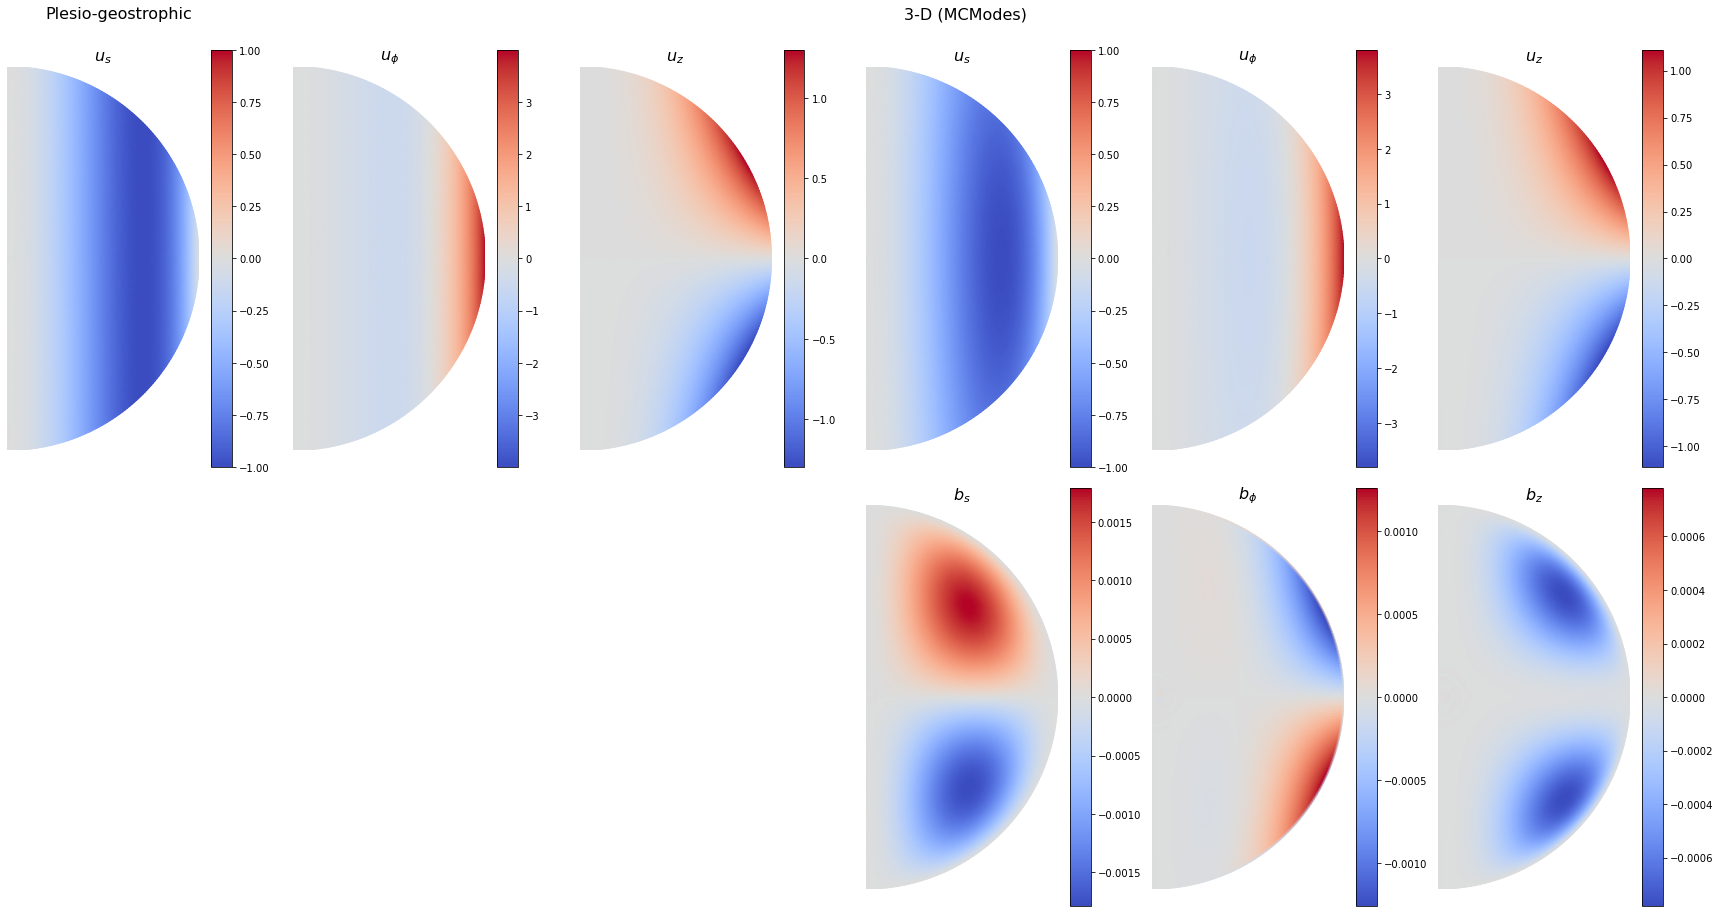

In [189]:
plot_fields = [
    ["U_s", "U_p", "U_z", ],
    ["B_s", "B_p", "B_z", ]
]
plot_fnames = [
    [r"$u_s$", r"$u_\phi$", r"$u_z$"],
    [r"$b_s$", r"$b_\phi$", r"$b_z$", ]
]

save_name = "./out/eigen/S1_T2_std/Canonical/Mode_ideal_merd_Le1e-4_m3-mc7_PGC-3DLu2e+4.png"
save_name = None
override = False

force_symmetric_cmap = True

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=2*ncols, figsize=(2*ncols*4, 2*nrows*3.2))
axes = np.atleast_2d(axes)

norm_pg = np.max(np.abs(np.real(p_factor_pg*eval_mode_pg['U_s'])))
norm_3d = np.max(np.abs(np.real(p_factor_3d*fields_3d['U_s'])))

for i_r in range(nrows):
    for i_c in range(ncols):
        fname = plot_fields[i_r][i_c]
        
        # PG plot
        ax = axes[i_r][i_c]
        if (fname is None) or (fname not in eval_mode_pg._field_names) or (eval_mode_pg[fname] is None):
            ax.remove()
        else:
            f_eval = np.real(p_factor_pg*eval_mode_pg[fname]/norm_pg)
            if np.abs(f_eval).max() > 1e-5:
                if force_symmetric_cmap:
                    climit = np.max(np.abs(f_eval))
                    # climit = 0.2
                    cm = ax.pcolormesh(S_mesh, Z_mesh, f_eval, shading="gouraud", cmap="coolwarm", vmin=-climit, vmax=+climit)
                    plt.colorbar(cm, ax=ax)
                else:
                    cm = ax.pcolormesh(S_mesh, Z_mesh, f_eval, shading="gouraud", cmap="coolwarm")
                    plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(S_mesh, Z_mesh, f_eval, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=16)
            ax.set_xlim([0, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
            if i_r == 0 and i_c == 0:
                ax.text(0.2, 1.25, 'Plesio-geostrophic', fontsize=16)
        
        ax = axes[i_r][ncols + i_c]
        if (fname is None) or (fname not in fields_3d) or (fields_3d[fname] is None):
            ax.remove()
        else:
            field_plot = np.real(p_factor_3d*fields_3d[fname]/norm_3d)
            if np.abs(field_plot).max() > 1e-5:
                if force_symmetric_cmap:
                    climit = np.max(np.abs(field_plot))
                    # climit = 0.6
                    # if fname == 'U_p':
                    #     climit = np.max(np.abs(field_plot[S_mesh < 0.6]))
                    cm = ax.pcolormesh(S_mesh, Z_mesh, field_plot, shading="gouraud", cmap="coolwarm", vmin=-climit, vmax=+climit)
                    plt.colorbar(cm, ax=ax)
                else:
                    cm = ax.pcolormesh(S_mesh, Z_mesh, field_plot, shading="gouraud", cmap="coolwarm")
                    plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(S_mesh, Z_mesh, field_plot, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=16)
            ax.set_xlim([0, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
            if i_r == 0 and i_c == 0:
                ax.text(0.2, 1.25, '3-D (MCModes)', fontsize=16)

plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

### Equatorial section

Calculate PG result on equatorial plane.

In [176]:
def calc_field_equatorial_PG(fname, field_f):
    N_trial = field_nrange[fname]
    S_tmp, N_tmp = np.meshgrid(rg, np.arange(field_nrange[fname]), indexing='ij')
    eval_tmp = field_f(S_tmp, 0., 0., N_tmp, *[vec for vec in evec_mode_pg])
    if np.array(eval_tmp).ndim == 0:
        return eval_tmp*np.ones_like(S_tmp[...,0])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    eval_rad = np.sum(eval_tmp, axis=-1)
    eval_azm = np.exp(1j*physical_params[xpd.m]*p_array)
    return np.outer(eval_azm, eval_rad)

def calc_field_eqrad_PG(fname, field_f):
    N_trial = field_nrange[fname]
    S_tmp, N_tmp = np.meshgrid(rg, np.arange(field_nrange[fname]), indexing='ij')
    eval_tmp = field_f(S_tmp, 0., 0., N_tmp, *[vec for vec in evec_mode_pg])
    if np.array(eval_tmp).ndim == 0:
        return eval_tmp*np.ones_like(S_tmp[...,0])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    eval_rad = np.sum(eval_tmp, axis=-1)
    return eval_rad

eqrad_pg = field_func.apply(calc_field_eqrad_PG, inplace=False, metadata=True)

Calculate 3-D result on the equatorial plane. 

In [177]:
uphy_eq = usp.equatorial_slice(worland_transform)
bphy_eq = bsp.equatorial_slice(worland_transform)

u_sph = {k: v[0, :] for k, v in uphy_eq.data.items()}
u_cyl = {'s': u_sph['r'], 'phi': u_sph['phi'], 'z': -u_sph['theta']}
b_sph = {k: v[0, :] for k, v in bphy_eq.data.items()}
b_cyl = {'s': b_sph['r'], 'phi': b_sph['phi'], 'z': -b_sph['theta']}

fields_3d_eq = {
    'U_s': u_cyl['s'], 'U_p': u_cyl['phi'], 'U_z': u_cyl['z'],
    'Bs_e': b_cyl['s'], 'Bp_e': b_cyl['phi'], 'Bz_e': b_cyl['z']
}

Calculating the PG quantities from 3D requires to evaluate the field at a common set of $(s, \phi)$ grid that is not natural grid for the 3-D model, and hence takes a while.

In [178]:
from pg_utils.numerics import utils as nutils

xi_quad, wt_quad = specfun.roots_legendre(65)

z_quad = np.outer(xi_quad, np.sqrt(1 - rg**2))
s_quad = rg*np.ones_like(z_quad)

r_pts, t_pts, p_pts = nutils.coord_cart2sph(s_quad.flatten(), np.array(0.), z_quad.flatten())
beval = bsp.evaluate(r_pts, t_pts, 0.)
beval_bg = mode_bg.evaluate(r_pts, t_pts, 0.)

beval_cyl = {
    's': beval['r']*np.sin(t_pts) + beval['theta']*np.cos(t_pts),
    'phi': beval['phi'],
    'z': beval['r']*np.cos(t_pts) - beval['theta']*np.sin(t_pts)
}
beval_bg_cyl = {
    's': beval_bg['r']*np.sin(t_pts) + beval_bg['theta']*np.cos(t_pts),
    'phi': beval_bg['phi'],
    'z': beval_bg['r']*np.cos(t_pts) - beval_bg['theta']*np.sin(t_pts)
}

b_quad = {k: v.reshape(z_quad.shape) for k, v in beval.items()}
b_bg_quad = {k: v.reshape(z_quad.shape) for k, v in beval_bg.items()}

b_quad_cyl = {k: v.reshape(z_quad.shape) for k, v in beval_cyl.items()}
b_bg_quad_cyl = {k: v.reshape(z_quad.shape) for k, v in beval_bg_cyl.items()}

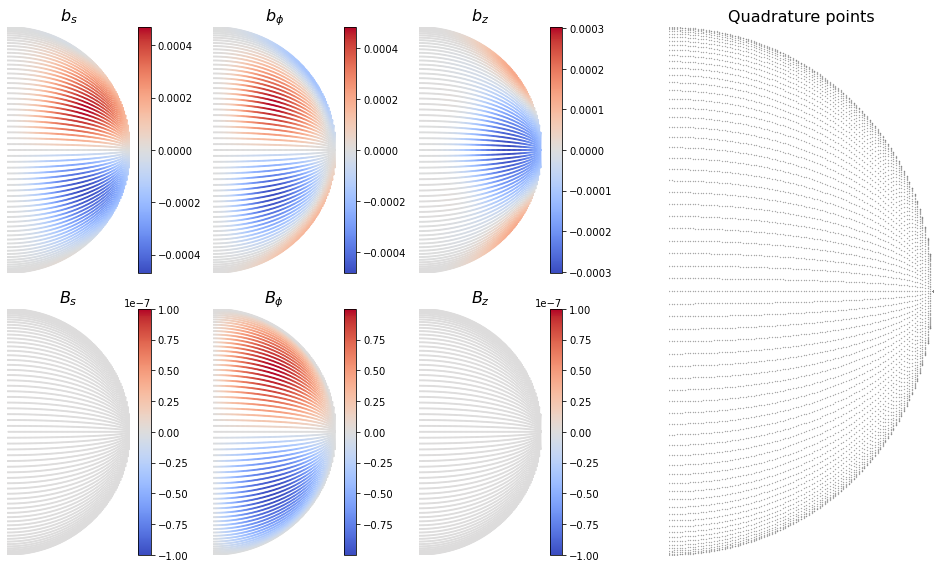

In [65]:
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(2, 5)

# normalizer = np.abs(ueval['r']).max()
normalizer = np.nanmax(np.abs(beval['r']**2 + beval['theta']**2 + beval['phi']**2))
# normalizer = np.sqrt(np.nanmax(np.real(beval_cyl['s'])**2 + np.real(beval_cyl['z'])**2 + np.real(beval_cyl['phi'])**2))
# normalizer = norm_3d

plot_fields = ['s', 'phi', 'z']
plot_fnames = [
    [r"$b_s$", r"$b_\phi$", r"$b_z$"],
    [r"$B_s$", r"$B_\phi$", r"$B_z$"]
]

f_phase = 1.

for i_c, comp in enumerate(plot_fields):
    ax = fig.add_subplot(gs[0, i_c])
    # climit = 1
    if np.nanmax(np.abs(np.real(f_phase*beval_cyl[comp])))/normalizer >= 1e-7:
        climit = np.nanmax(np.abs(np.real(f_phase*beval_cyl[comp])))/normalizer
    else:
        climit = 1e-7
    im = ax.scatter(s_quad.flatten(), z_quad.flatten(), 1, c=np.real(f_phase*beval_cyl[comp])/normalizer, cmap='coolwarm', vmin=-climit, vmax=+climit)
    plt.colorbar(im, ax=ax)
    ax.set_xlim([0, 1])
    ax.set_ylim([-1, 1])
    ax.set_aspect('equal', 'box')
    ax.set_title(plot_fnames[0][i_c], fontsize=16)
    ax.axis("off")
    
    ax = fig.add_subplot(gs[1, i_c])
    # climit = 1
    if np.nanmax(np.abs(np.real(beval_bg_cyl[comp]))) >= 1e-7:
        climit = np.nanmax(np.abs(np.real(beval_bg_cyl[comp])))
    else:
        climit = 1e-7
    im = ax.scatter(s_quad.flatten(), z_quad.flatten(), 1, c=np.real(beval_bg_cyl[comp]), cmap='coolwarm', vmin=-climit, vmax=+climit)
    # ax.streamplot(s_quad, z_quad, b_bg_quad_cyl['s'], b_bg_quad_cyl['z'], density=.5, minlength=.2)
    plt.colorbar(im, ax=ax)
    ax.set_xlim([0, 1])
    ax.set_ylim([-1, 1])
    ax.set_aspect('equal', 'box')
    ax.set_title(plot_fnames[1][i_c], fontsize=16)
    ax.axis("off")
    
ax = fig.add_subplot(gs[:, 3:])
ax.scatter(s_quad.flatten(), z_quad.flatten(), s=.1, c='gray')
ax.set_xlim([0, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal', 'box')
ax.set_title("Quadrature points", fontsize=16)
ax.axis("off")

plt.tight_layout()
plt.show()

Integration

In [179]:
eqrad_3d = base.LabeledCollection(['U_s', 'U_p', 'U_z'] + base.CollectionPG.pg_field_names)
for key, val in fields_3d_eq.items():
    eqrad_3d[key] = val

from pg_utils.pg_model import pg_3d
m_3d = pg_3d.moments_3d_linearised(b_bg_quad_cyl, b_quad_cyl, z_quad)
wt_3d = np.outer(wt_quad, np.sqrt(1 - rg**2))
eqrad_3d = pg_3d.moments_int_pg(m_3d, z_quad, wt_3d, axis=0, out_field=eqrad_3d)

Choose phase

In [180]:
anchor_phase_pg = 1/eqrad_pg['U_s'][np.argmax(np.abs(eqrad_pg['U_s']))]
p_cst_pg = np.angle(anchor_phase_pg)/physical_params[xpd.m]
p_factor_pg = np.exp(1j*float(physical_params[xpd.m])*(p_array + p_cst_pg))

In [181]:
anchor_phase_3d = 1/u_cyl['s'][np.argmax(np.abs(u_cyl['s']))]
p_cst_3d = np.angle(anchor_phase_3d)/m_val
p_factor_3d = np.exp(1j*m_val*(p_array + p_cst_3d))

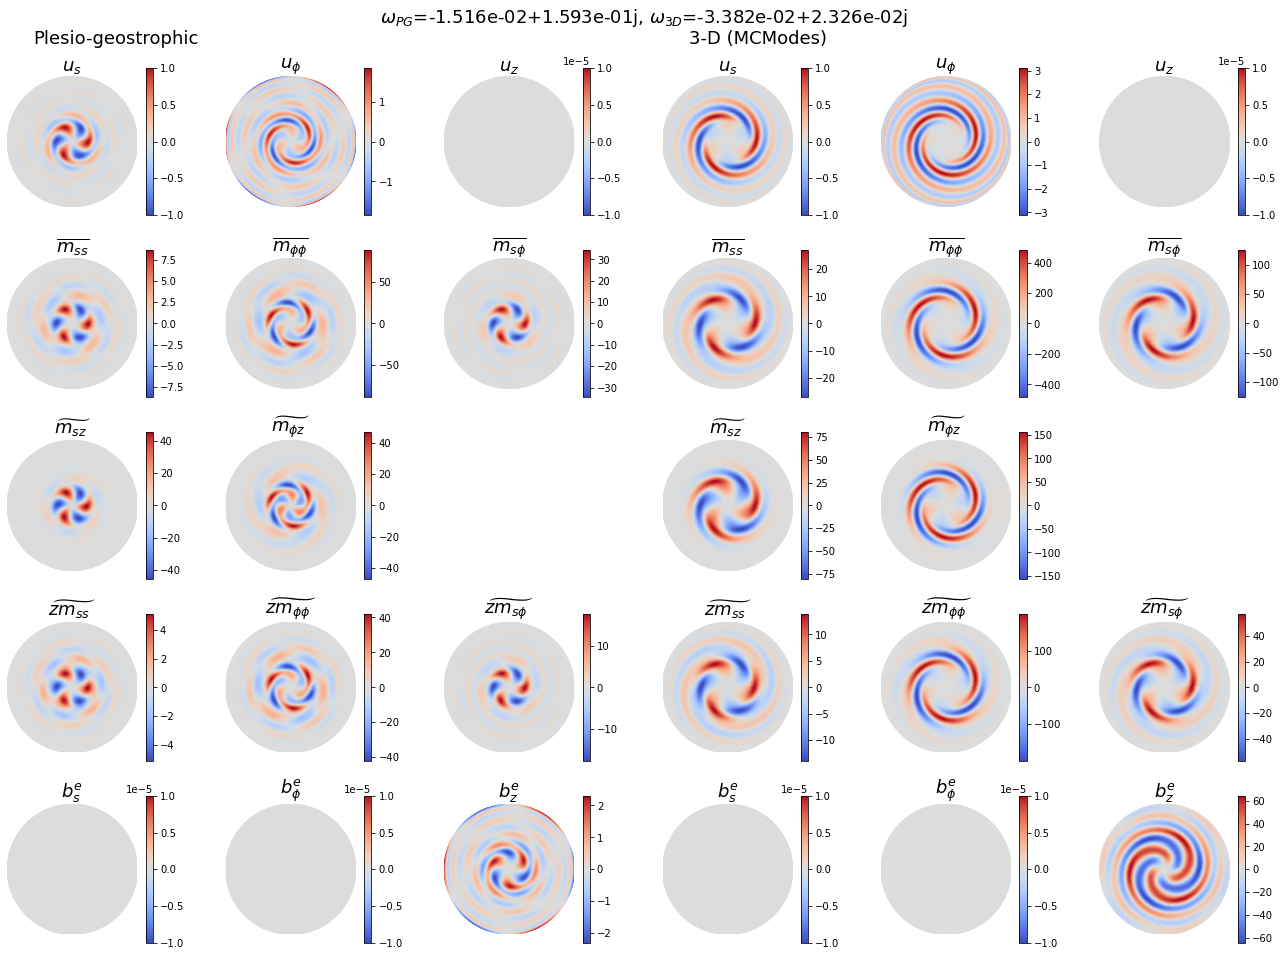

In [182]:
plot_fields = [
    ["U_s", "U_p", "U_z"],
    ["Mss", "Mpp", "Msp"], 
    ["Msz", "Mpz", None],
    ["zMss", "zMpp", "zMsp"],
    ["Bs_e", "Bp_e", "Bz_e"]
]
plot_fnames = [
    [r"$u_s$", r"$u_\phi$", r"$u_z$"],
    [r'$\overline{m_{ss}}$', r'$\overline{m_{\phi\phi}}$', r'$\overline{m_{s\phi}}$'], 
    [r'$\widetilde{m_{sz}}$', r'$\widetilde{m_{\phi z}}$', None], 
    [r'$\widetilde{zm_{ss}}$', r'$\widetilde{zm_{\phi\phi}}$', r'$\widetilde{zm_{s\phi}}$'],
    [r'$b_s^e$', r'$b_\phi^e$', r'$b_z^e$']
]
# plot_fields = [['U_s', 'U_p', 'U_z'],]
# plot_fnames = [[r"$u_s$", r"$u_\phi$", "$u_z$"],]

rotate_us_max = True
S_eq, P_eq = np.meshgrid(rg, p_array)
X_mesh, Y_mesh = S_eq*np.cos(P_eq), S_eq*np.sin(P_eq)

save_name = './out/eigen/S1_T2_std/Canonical/Mode_ideal_equa_Le1e-4_m3-mc7_PGC-3DLu2e+4'
# save_name = None
override = False

norm_pg = np.abs(eqrad_pg['U_s']).max()
norm_3d = np.abs(fields_3d_eq['U_s']).max()

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=2*ncols, figsize=(2*ncols*3, nrows*2.7))
axes = np.atleast_2d(axes)

for i_r in range(nrows):
    for i_c in range(ncols):
        fname = plot_fields[i_r][i_c]
        
        ax = axes[i_r][i_c]
        if (fname is None) or (fname not in eqrad_pg._field_names) or (eqrad_pg[fname] is None):
            ax.remove()
        else:
            f_plot = np.real(np.outer(p_factor_pg, eqrad_pg[fname])/norm_pg)
            if np.abs(f_plot).max() > 1e-5:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm")
                plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=18)
            ax.set_xlim([-1, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
            if i_r == 0 and i_c == 0:
                ax.text(-0.6, 1.5, 'Plesio-geostrophic', fontsize=18)
                
        ax = axes[i_r][ncols+i_c]
        if (fname is None) or (fname not in eqrad_3d._field_names) or (eqrad_3d[fname] is None):
            ax.remove()
        else:
            f_plot = np.real(np.outer(p_factor_3d, eqrad_3d[fname])/norm_3d)
            if np.abs(f_plot).max() > 1e-5:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm")
                plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=18)
            ax.set_xlim([-1, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
            if i_r == 0 and i_c == 0:
                ax.text(-0.6, 1.5, '3-D (MCModes)', fontsize=18)

fig.suptitle('$\\omega_{{PG}}$={:.3e}, $\\omega_{{3D}}$={:.3e}'.format(eig_vals_pg[i_pg], eig_vals_3d[i_3d]), fontsize=18)
plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")

plt.show()